In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import numpy as np
from datetime import datetime
%matplotlib inline
mpl.rcParams['figure.figsize'] = (16,9)

pd.set_option('display.max_rows', 500)

# Collection of Data

website for collected data: https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data.csv

In [4]:
country_data = pd.read_csv('../data/raw/owid-covid-data.csv')

In [5]:
country_data.head()     #top 5 data from dataset

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [6]:
# now important data 
imp_data = country_data[['date', 'location','total_cases', 'population', 'people_fully_vaccinated']] #we need only selected columns

In [7]:
imp_data.head()

,date,location,total_cases,population,people_fully_vaccinated
0,2020-02-24,Afghanistan,5.0,39835428.0,NaN
1,2020-02-25,Afghanistan,5.0,39835428.0,NaN
2,2020-02-26,Afghanistan,5.0,39835428.0,NaN
3,2020-02-27,Afghanistan,5.0,39835428.0,NaN
4,2020-02-28,Afghanistan,5.0,39835428.0,NaN


In [8]:
#renaming of columns of data  
imp_data = imp_data.rename(columns={'location':'Country', 'total_cases':'Infected_population', 'population':'Total_population', 'people_fully_vaccinated':'Vaccinated'})

In [9]:
imp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196774 entries, 0 to 196773
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   date                 196774 non-null  object 
 1   Country              196774 non-null  object 
 2   Infected_population  188872 non-null  float64
 3   Total_population     195587 non-null  float64
 4   Vaccinated           49072 non-null   float64
dtypes: float64(3), object(2)
memory usage: 7.5+ MB


In [10]:
imp_data['Relativecases'] = imp_data['Infected_population']/(imp_data['Total_population']) #Relativecases

In [11]:
imp_data['vaccination_ratio'] = (imp_data['Vaccinated']/imp_data['Total_population']) #vaccination rate
imp_data['vaccination_rate'] = imp_data['vaccination_ratio']*100

In [12]:
imp_data.head()

,date,Country,Infected_population,Total_population,Vaccinated,Relativecases,vaccination_ratio,vaccination_rate
0,2020-02-24,Afghanistan,5.0,39835428.0,NaN,1.255164e-07,NaN,NaN
1,2020-02-25,Afghanistan,5.0,39835428.0,NaN,1.255164e-07,NaN,NaN
2,2020-02-26,Afghanistan,5.0,39835428.0,NaN,1.255164e-07,NaN,NaN
3,2020-02-27,Afghanistan,5.0,39835428.0,NaN,1.255164e-07,NaN,NaN
4,2020-02-28,Afghanistan,5.0,39835428.0,NaN,1.255164e-07,NaN,NaN


# data type correction of Date

In [13]:
date = imp_data['date'][0]


In [14]:
date_new = [datetime.strptime(each, '%Y-%m-%d') for each in imp_data.date]

In [15]:
imp_data['date'] = date_new

In [16]:
imp_data.dtypes #data types of all columns (data)

date                   datetime64[ns]
Country                        object
Infected_population           float64
Total_population              float64
Vaccinated                    float64
Relativecases                 float64
vaccination_ratio             float64
vaccination_rate              float64
dtype: object

# all country data

In [17]:
imp_data['Country'].unique()  #unique to filterout similar name of country if available in data

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [18]:
Italy_data = imp_data[imp_data['Country'] == 'Italy']   #data of Italy
Italy_data.tail()

,date,Country,Infected_population,Total_population,Vaccinated,Relativecases,vaccination_ratio,vaccination_rate
88961,2022-06-21,Italy,17959329.0,60367471.0,47944842.0,0.297500,0.794217,79.421651
88962,2022-06-22,Italy,18014202.0,60367471.0,47945408.0,0.298409,0.794226,79.422588
88963,2022-06-23,Italy,18071634.0,60367471.0,47945870.0,0.299360,0.794234,79.423354
88964,2022-06-24,Italy,18128044.0,60367471.0,47946335.0,0.300295,0.794241,79.424124
88965,2022-06-25,Italy,18184917.0,60367471.0,47946885.0,0.301237,0.794250,79.425035


# Plotting Data of 3 countries (Italy, France & Canada)

In [19]:
Countries = ['Italy', 'France', 'Canada']

In [20]:
Analysis = Italy_data.set_index(['date'])

In [21]:
Analysis.head()

,Country,Infected_population,Total_population,Vaccinated,Relativecases,vaccination_ratio,vaccination_rate
date,,,,,,,
2020-01-31,Italy,2.0,60367471.0,NaN,3.313043e-08,NaN,NaN
2020-02-01,Italy,2.0,60367471.0,NaN,3.313043e-08,NaN,NaN
2020-02-02,Italy,2.0,60367471.0,NaN,3.313043e-08,NaN,NaN
2020-02-03,Italy,2.0,60367471.0,NaN,3.313043e-08,NaN,NaN
2020-02-04,Italy,2.0,60367471.0,NaN,3.313043e-08,NaN,NaN


In [22]:
imp_data= imp_data.set_index(['date'])

In [23]:

for each in Countries:
    Analysis[each+'_Infected_population'] = pd.DataFrame(imp_data[imp_data['Country'] == each]['Infected_population'])
    Analysis[each+'_Relativecases'] = pd.DataFrame(imp_data[imp_data['Country'] == each]['Relativecases'])
    Analysis[each+'_Vaccination_Rate'] = pd.DataFrame(imp_data[imp_data['Country'] == each]['vaccination_rate'])

In [24]:
final_data = Analysis.drop(['Country','Infected_population','Total_population','Vaccinated','Relativecases', 'vaccination_ratio','vaccination_rate'],axis=1)

In [25]:
final_data.tail(10)

,Italy_Infected_population,Italy_Relativecases,Italy_Vaccination_Rate,France_Infected_population,France_Relativecases,France_Vaccination_Rate,Canada_Infected_population,Canada_Relativecases,Canada_Vaccination_Rate
date,,,,,,,,,
2022-06-16,17773764.0,0.294426,79.418278,30089270.0,0.446283,78.422040,3923344.0,0.103062,82.559934
2022-06-17,17809934.0,0.295025,79.419123,30139875.0,0.447033,78.425910,3925101.0,0.103108,82.563186
2022-06-18,17844905.0,0.295605,79.419996,30139875.0,0.447033,78.428038,3925888.0,0.103129,82.566822
2022-06-19,17879160.0,0.296172,79.420046,30139875.0,0.447033,78.428514,3925888.0,0.103129,82.570980
2022-06-20,17896065.0,0.296452,79.420778,30241832.0,0.448545,78.430987,3927161.0,0.103162,82.572888
2022-06-21,17959329.0,0.297500,79.421651,30337149.0,0.449959,78.434240,3929591.0,0.103226,82.575664
2022-06-22,18014202.0,0.298409,79.422588,30415116.0,0.451116,78.437600,3932564.0,0.103304,82.581877
2022-06-23,18071634.0,0.299360,79.423354,30494968.0,0.452300,78.440691,3937332.0,0.103429,82.592035
2022-06-24,18128044.0,0.300295,79.424124,30574230.0,0.453476,NaN,3939607.0,0.103489,NaN


### Ploting of Infected Population data

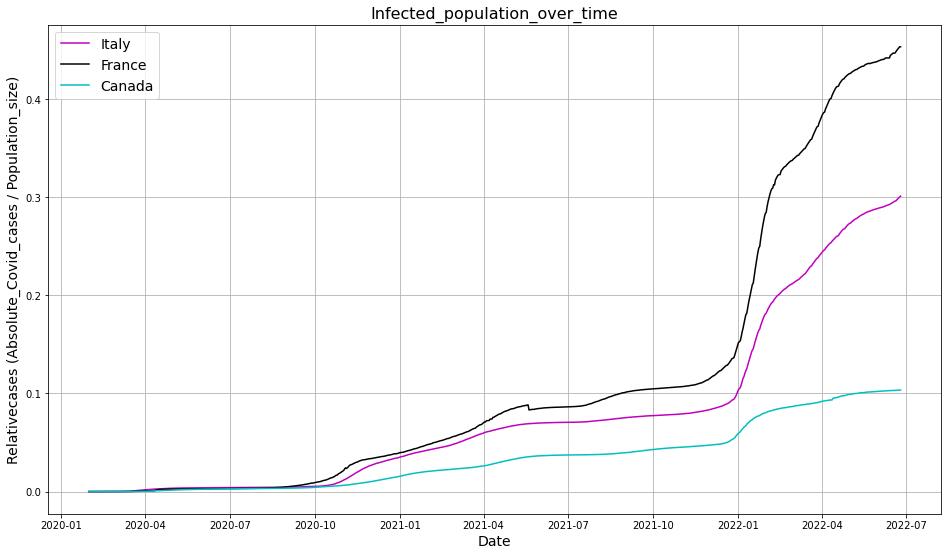

In [26]:
fig, ax1 = plt.subplots(1,1)
ax1.plot(final_data.index, final_data['Italy_Relativecases'], label='Italy', color = 'm')
ax1.plot(final_data.index, final_data['France_Relativecases'], label='France', color = 'k')
ax1.plot(final_data.index, final_data['Canada_Relativecases'], label='Canada', color = 'c')

ax1.set_yscale('linear')
ax1.set_title('Infected_population_over_time', size = 16)
ax1.set_xlabel('Date', size = 14)
ax1.set_ylabel('Relativecases (Absolute_Covid_cases / Population_size)', size = 14)
ax1.legend(loc='best', prop={'size':14})
plt.grid()

### Ploting of Percentage of Vaccinated population overtime

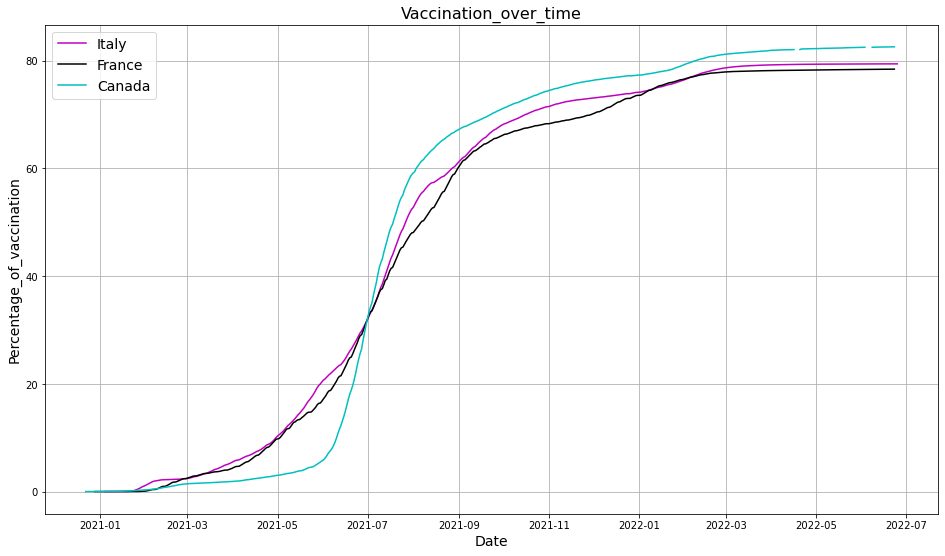

In [27]:
fig, ax1 = plt.subplots(1,1)
ax1.plot(final_data.index, final_data['Italy_Vaccination_Rate'], label='Italy', color = 'm')
ax1.plot(final_data.index, final_data['France_Vaccination_Rate'], label='France', color = 'k')
ax1.plot(final_data.index, final_data['Canada_Vaccination_Rate'], label='Canada', color = 'c')

ax1.set_yscale('linear')

ax1.set_title('Vaccination_over_time', size = 16)
ax1.set_xlabel('Date', size = 14)
ax1.set_ylabel('Percentage_of_vaccination', size = 14)

ax1.legend(loc='best', prop={'size':14})
plt.grid()